# Tensorflow model movies prediction

**Group:** 2

**Members:** Yoann Loial - Victor Mader - Tristan Chaput

**Output metrics:** Top 3 genre prediction

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Reading the Dataset

In [5]:
df = pd.read_csv('./data/Multi_Label_dataset_/train.csv')

In [25]:
df = df.head(1900)

In [26]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Converting the images into Numpy array to train the CNN

In [27]:
width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
  path = './data/Multi_Label_dataset_/Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 1500/1500 [00:03<00:00, 406.37it/s]


In [28]:
X.shape

(1500, 350, 350, 3)

In [29]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(1500, 25)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

# Preparing the model

In [31]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 348, 348, 16)      448       
                                                                 
 batch_normalization_8 (Batc  (None, 348, 348, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 174, 174, 16)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 174, 174, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_9 (Batc  (None, 172, 172, 32)    

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
43/43 [==============================] - 56s 1s/step - loss: 0.2357 - accuracy: 0.3570 - val_loss: 10.7167 - val_accuracy: 0.0133
Epoch 2/5
43/43 [==============================] - 58s 1s/step - loss: 0.2047 - accuracy: 0.4044 - val_loss: 6.5748 - val_accuracy: 0.0867
Epoch 3/5
43/43 [==============================] - 57s 1s/step - loss: 0.1791 - accuracy: 0.4541 - val_loss: 5.8009 - val_accuracy: 0.0800
Epoch 4/5
43/43 [==============================] - 57s 1s/step - loss: 0.1573 - accuracy: 0.4600 - val_loss: 6.0909 - val_accuracy: 0.1467
Epoch 5/5
43/43 [==============================] - 58s 1s/step - loss: 0.1399 - accuracy: 0.5059 - val_loss: 4.2716 - val_accuracy: 0.1667


In [36]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

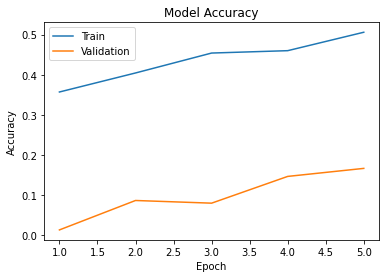

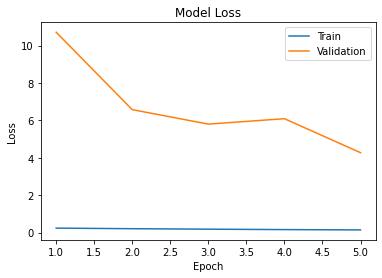

In [37]:
plotLearningCurve(history,5)

# Applying the trained model to Predict the Genre of the input image

1/1 [==============================] - 0s 29ms/step
Action
Drama
Adventure


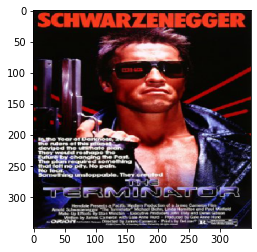

In [40]:
img = image.load_img('./data/Multi_Label_dataset_/Images/tt0088247.jpg',target_size=(width,height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])